In [1]:
from vcat import ImageData, ImageCube
from vcat.graph_generator import KinematicPlot
import glob
from IPython.display import Video

2025-03-25 21:22:38,530 - INFO - vcat - Logging initialized. Log file: Console only.
2025-03-25 21:22:38,530 - INFO - vcat - No environment variable VCAT_CONFIG found, will use defaults.
2025-03-25 21:22:38,531 - INFO - vcat - Using DIFMAP path: /usr/local/difmap/uvf_difmap_2.5g/


Thank you for using VCAT. Have fun with VLBI!
If you are using this package please cite VCAT Team et al. 2025 ....


2025-03-25 21:22:39,099 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-03-25 21:22:39,275 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method



Image of the source 3C111 at frequency 15.2 GHz on 2014-05-08 
    Total cleaned flux: 3474.345 mJy 
    Image Noise: 0.252 mJy using method 'Histogram Fit'
No polarization data loaded.
Model information: 
    Model Flux: 3472.457 mJy 
    Number of Components: 12


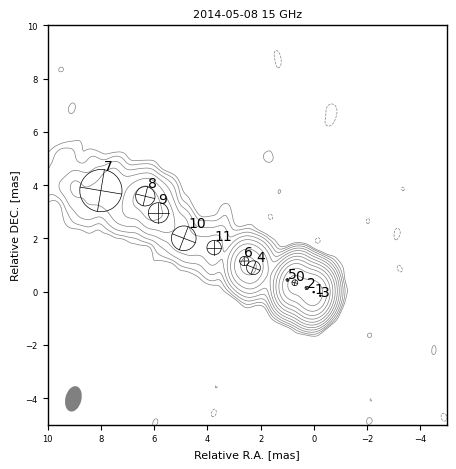

In [2]:
#Let's load an image with modelfit first
dataU=ImageData("../dataset_example/3C111_U_2014_05_08/3C111_U_2014_05_08.fits",
       model="../dataset_example/3C111_U_2014_05_08/3C111_U_2014_05_08.mfit") #this can be either .fits or .mod file

#let's print some info and plot it with the modelcomps and automatically associated ids
print(dataU)
dataU.plot(plot_model=True,plot_comp_ids=True,xlim=[10,-5],ylim=[-5,10])

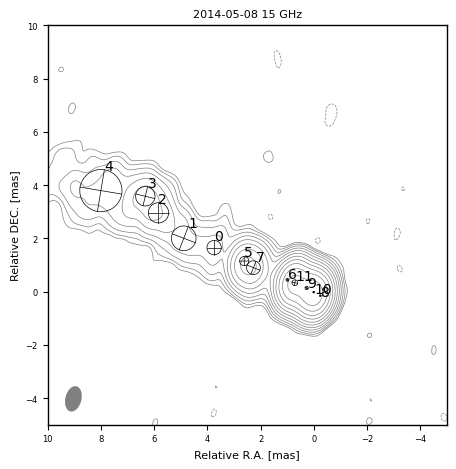

In [3]:
#Let's modify the component IDs and assign them to our liking.
#Let's first use a list of the old comp_ids
old_ids=[0,1,2,3,4,5,6,7,8,9,10,11]

#and now the new IDs that we want to assign them
new_ids=[11,10,9,8,7,6,5,4,3,2,1,0]

#and finally execute the change
dataU.change_component_ids(old_ids,new_ids)

#we also want to assign the core component to be comp 1
dataU.set_core_component(1)

#let's plot it again
dataU.plot(plot_model=True,plot_comp_ids=True,xlim=[10,-5],ylim=[-5,10])

In [4]:
#Let's check if the core assignment worked   
print(dataU.get_core_component())

Component with ID 1 at frequency 15.2 GHz
x: 4.88mas, y:2.00mas
Maj: 0.93mas, Min: 0.93, PA: -21.037599563598633°
Flux: 0.027979200705885887 Jy, Distance to Core: 0.00 mas



In [5]:
#Similarly we can get info about any other component 
print(dataU.get_component(10))

Component with ID 10 at frequency 15.2 GHz
x: 0.00mas, y:-0.02mas
Maj: 0.06mas, Min: 0.06, PA: -141.33999633789062°
Flux: 0.8844209909439087 Jy, Distance to Core: 5.28 mas



In [6]:
#Let's load some more data
dataC=ImageData("../dataset_example/3C111_C_2014_05_08/3C111_C_2014_05_08.fits",
        model="../dataset_example/3C111_C_2014_05_08/3C111_C_2014_05_08.mfit")
dataQ=ImageData("../dataset_example/3C111_Q_2014_05_08/3C111_Q_2014_05_08.fits",
        model="../dataset_example/3C111_Q_2014_05_08/3C111_Q_2014_05_08.mfit")
dataW=ImageData("../dataset_example/3C111_W_2014_05_08/3C111_W_2014_05_08.fits",
        model="../dataset_example/3C111_W_2014_05_08/3C111_W_2014_05_08.mfit")
dataX=ImageData("../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.fits",
        model="../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.mfit")

#Now we have to manually associate the components to the right ID, this is a bit tedious and will soon be replaced with a GUI version
#For now, let's use the following associations:

old_ids=[]
new_ids=[]
core_id=0

dataQ.change_component_ids(old_ids,new_ids)
dataQ.set_core_component(core_id)

old_ids=[]
new_ids=[]
core_id=0

dataW.change_component_ids(old_ids,new_ids)
dataW.set_core_component(core_id)

old_ids=[]
new_ids=[]
core_id=4

dataX.change_component_ids(old_ids,new_ids)
dataX.set_core_component(core_id)

old_ids=[]
new_ids=[]
core_id=6

dataC.change_component_ids(old_ids,new_ids)
dataC.set_core_component(core_id)

2025-03-25 21:22:54,528 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-03-25 21:22:54,853 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-03-25 21:23:02,038 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-03-25 21:23:02,062 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-03-25 21:23:07,351 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-03-25 21:23:07,360 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-03-25 21:23:10,001 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-03-25 21:23:10,328 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method


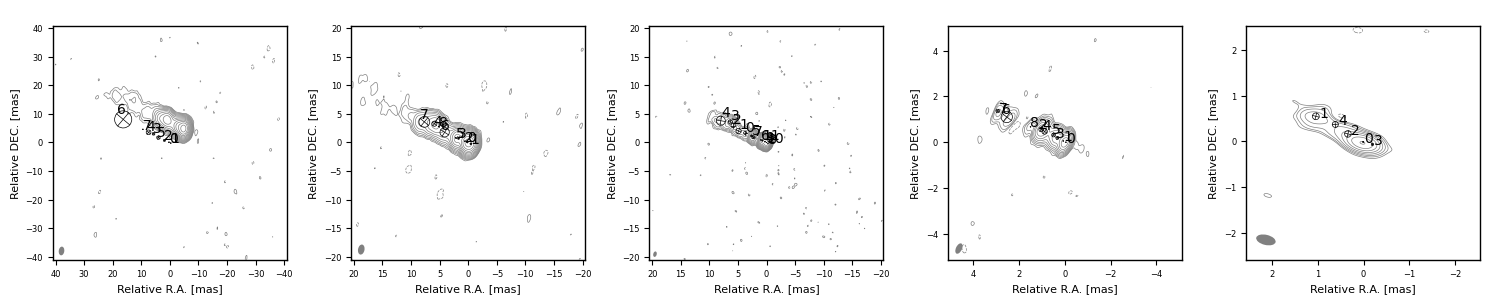

In [7]:
#Now that all components were correctly identified, we will load the images as an ImageCube for easier handling
im_cube=ImageCube([dataC,dataX,dataU,dataQ,dataW])

#let's double check the associations
im_cube.plot(plot_model=True,plot_comp_ids=True)

/home/flep98/VCAT/vcat/kinematics.py:387: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if epochs=="":
2025-03-25 21:23:36,474 - INFO - vcat - 2014.3479452054794
2025-03-25 21:23:36,474 - INFO - vcat - Fit component spectrum

2025-03-25 21:23:36,475 - INFO - vcat - Fit Powerlaw to Comp1
2025-03-25 21:23:36,476 - INFO - vcat - Fit SSA to Comp 1
2025-03-25 21:23:36,478 - INFO - vcat - Power law fits better



fit_type=2
Beta: [88.5451417  -2.93713832]
Beta Std Error: [227.22668711   1.14626648]
Beta Covariance: [[ 1.26620383e+03 -6.18634854e+00]
 [-6.18634854e+00  3.22222701e-02]]
Residual Variance: 40.776979380096066
Inverse Condition #: 0.0012514124608972955
Reason(s) for Halting:
  Sum of squares convergence
fit_type=2
Beta: [55.23644031  0.66962223 -5.71939876]
Beta Std Error: [5800105.81155786  221514.20533983 2535632.77371352]
Beta Covariance: [[ 7.61236469e+11  2.90726923e+10 -3.32789815e+11]
 [ 2.90726923e+10  1.11032704e+09 -1.27097115e+10]
 [-3.32789815e+11 -1.27097115e+10  1.45485753e+11]]
Residual Variance: 44.19287411641044
Inverse Condition #: 9.904323164157628e-08
Reason(s) for Halting:
  Sum of squares convergence


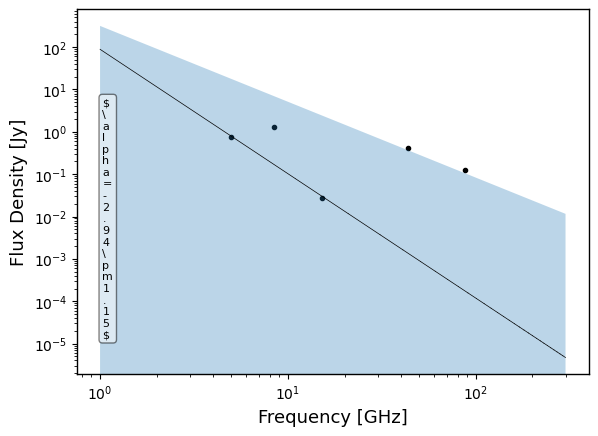

[{'fit': 'PL',
  'alpha': -2.9371383236801023,
  'alphaE': 1.1462664795940591,
  'chi2': 40.776979380096066,
  'pl_p': array([88.5451417 , -2.93713832]),
  'pl_sd': array([227.22668711,   1.14626648])}]

In [8]:
#That looks good, let's see if we can fit a component spectrum to specific components
#We can call this directly on the image cube
comp_id=1
im_cube.fit_comp_spectrum(comp_id,plot=True)

/home/flep98/VCAT/vcat/kinematics.py:328: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if epochs=="":
2025-03-25 21:23:36,965 - INFO - vcat - Fitted k_r: 0.5707632795027443
2025-03-25 21:23:36,966 - INFO - vcat - Fitted r0: -268.6039899124848


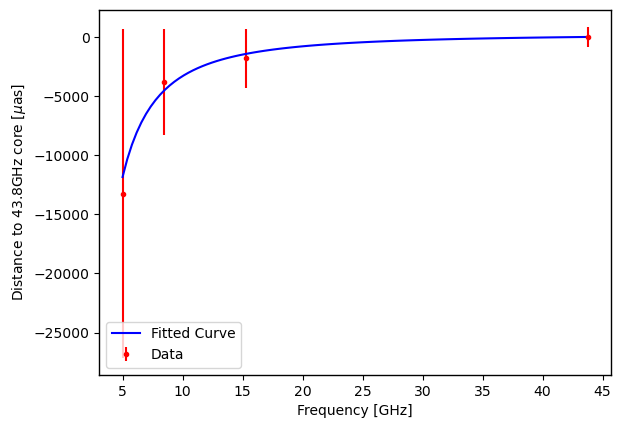

[{'k_r': 0.5707632795027443,
  'r0': -268.6039899124848,
  'ref_freq': 43.787875,
  'freqs': array([ 4.979875,  8.415875, 15.247875, 43.787875]),
  'coreshifts': [-13262.233369432995,
   -3811.3041136346815,
   -1803.5143736285688,
   0.0],
  'coreshift_err': [13901.039502230858,
   4479.842202702812,
   2507.357024641277,
   883.5435459162361]}]

In [9]:
#In addition to the component spectrum, we can also derive the core shift, based on a given component
im_cube.fit_coreshift(5,plot=True)

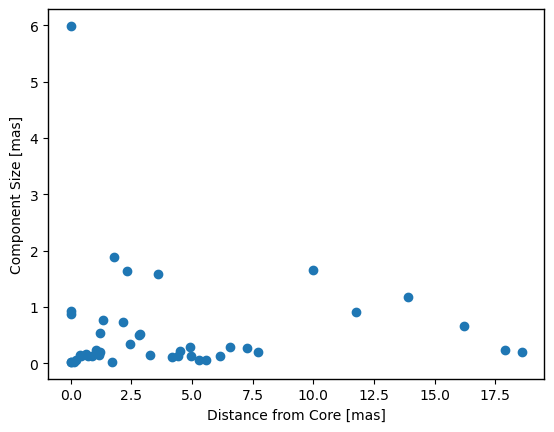

In [10]:
#Additionally, we can have a look at different jet profiles, based on the modelfits.
#Let's say we want to plot the jet collimation profile, this can be done using:
x,y=im_cube.get_model_profile("maj") #other options are 'flux','tb'

In [11]:
#So far we have looked at a single-epoch multi-frequency dataset
#Let's also have a look at a single-frequency multi-epoch dataset

#We will load some MOJAVE epochs of 0506+056 where modelfits were performed
uvf_files=glob.glob("../dataset_example/0506+056_kinematic/*.uvf")
model_files=glob.glob("../dataset_example/0506+056_kinematic/*fits")

#Let's load them as an ImageCube
im_cube=ImageCube().import_files(uvf_files=uvf_files,model_fits_files=model_files)

2025-03-25 21:23:37,322 - INFO - vcat - Importing images:
Processing:   0%|                                        | 0/11 [00:00<?, ?it/s]2025-03-25 21:23:37,430 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-03-25 21:23:37,495 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
Processing:   9%|██▉                             | 1/11 [00:01<00:12,  1.25s/it]2025-03-25 21:23:38,668 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-03-25 21:23:38,722 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
Processing:  18%|█████▊                          | 2/11 [00:02<00:11,  1.24s/it]2025-03-25 21:23:39,898 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-03-25 21:23:39,950 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
Processing:  27%|████████▋                       | 3/11 [00:03<00:09,  1.22s/it]2025

In [12]:
#We have already used the VCAT GUI to assign the component numbers, so we can load a component_info.csv file
im_cube.import_component_association("../dataset_example/0506+056_kinematic/component_info.csv")

/home/flep98/VCAT/vcat/kinematics.py:289: RuntimeWarning: invalid value encountered in double_scalars
  t_0 = - linear_fit[-1] / speed + t_mid
/home/flep98/VCAT/vcat/kinematics.py:290: RuntimeWarning: divide by zero encountered in divide
  sum_x = time / np.array(dist_err) ** 2
/home/flep98/VCAT/vcat/kinematics.py:291: RuntimeWarning: divide by zero encountered in divide
  sum_x2 = time ** 2 / np.array(dist_err) ** 2
/home/flep98/VCAT/vcat/kinematics.py:292: RuntimeWarning: divide by zero encountered in divide
  sum_err = 1. / np.array(dist_err) ** 2
/home/flep98/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/flep98/VCAT/vcat/kinematics.py:294: RuntimeWarning: invalid value encountered in double_scalars
  t_0_err = np.sqrt((cov_matrix[-1, -1] / speed ** 2) + (linear_fit[-1] ** 2 * cov_matrix[0, 0] / speed ** 4) +
/home/flep98/VCAT/vcat/kinematics.py:

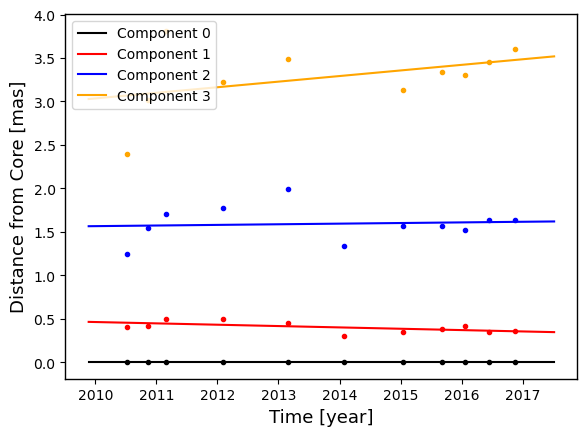

[{'name': 'Component 0', 'speed': 0.0, 'speed_err': 0.0, 'y0': 0.0, 'y0_err': 0.0, 'beta_app': 0.0, 'beta_app_err': 0.0, 'd_crit': 1.0, 'd_crit_err': 0.0, 'dist_0_est': 0.0, 't_0': nan, 't_0_err': nan, 'red_chi_sqr': nan, 't_mid': 2013.7029044090127, 'linear_fit': array([0., 0.]), 'cov_matrix': array([[ 0., -0.],
       [-0.,  0.]])}, {'name': 'Component 1', 'speed': -0.015468724865906435, 'speed_err': 0.007094429120975781, 'y0': 31.553731445008484, 'y0_err': 0.016086941825544133, 'beta_app': -0.0, 'beta_app_err': 0.0, 'd_crit': 1.0, 'd_crit_err': -0.0, 'dist_0_est': 31.553731445008484, 't_0': 2039.8404987184122, 't_0_err': 12.016257125443545, 'red_chi_sqr': 3.4641295269253427, 't_mid': 2013.7029044090127, 'linear_fit': array([-0.01546872,  0.40431526]), 'cov_matrix': array([[ 5.03309246e-05, -5.75824631e-06],
       [-5.75824631e-06,  2.58789697e-04]])}, {'name': 'Component 2', 'speed': 0.00718360151097813, 'speed_err': 0.028297690681530832, 'y0': -12.874024150431074, 'y0_err': 0.0641

In [13]:
#We now have an ImageCube with correctly labelled components, that means we can call the kinematic fit functions

#Let's do a simple 1d linear fit of the core distance vs time
fit=im_cube.get_speed(order=1,show_plot=True)

#The returned fit parameter includes useful information about the apparent speed, critical Doppler_factor etc. of each component
print(fit)

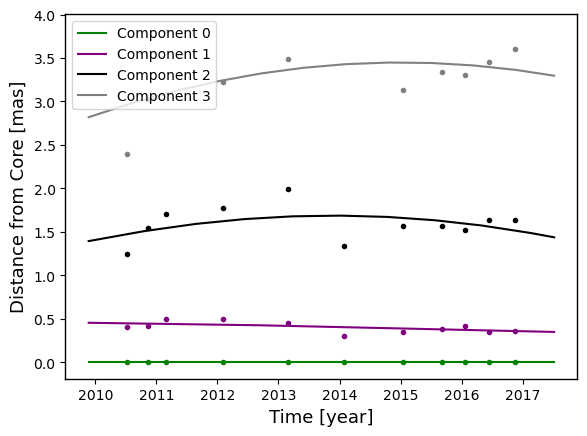

[[{'name': 'Component 0', 'speed': 0.0, 'speed_err': 0.0, 'y0': 0.0, 'y0_err': 0.0, 'beta_app': 0.0, 'beta_app_err': 0.0, 'd_crit': 1.0, 'd_crit_err': 0.0, 'dist_0_est': 0.0, 't_0': nan, 't_0_err': nan, 'red_chi_sqr': nan, 't_mid': 2013.7029044090127, 'linear_fit': array([0., 0., 0.]), 'cov_matrix': array([[ 0.,  0., -0.],
       [ 0.,  0., -0.],
       [-0., -0.,  0.]])}, {'name': 'Component 0', 'speed': 0.0, 'speed_err': 0.0, 'y0': 0.0, 'y0_err': 0.0, 'beta_app': 0.0, 'beta_app_err': 0.0, 'd_crit': 1.0, 'd_crit_err': 0.0, 'dist_0_est': 0.0, 't_0': nan, 't_0_err': nan, 'red_chi_sqr': nan, 't_mid': 2013.7029044090127, 'linear_fit': array([0., 0., 0.]), 'cov_matrix': array([[ 0.,  0., -0.],
       [ 0.,  0., -0.],
       [-0., -0.,  0.]])}], [{'name': 'Component 1', 'speed': 0.00459536459278322, 'speed_err': 0.0023523100857111134, 'y0': -9.344824436715566, 'y0_err': 0.01462353294066674, 'beta_app': 0.0, 'beta_app_err': 0.0, 'd_crit': 1.0, 'd_crit_err': 0.0, 'dist_0_est': -9.344824436715

In [14]:
#Alternatively, we can fit x- and y-coordinates seperately, and we can choose a n-th order polynom to fit
order=2

#additionally, we can adjust the plot colors
colors=["green","purple","black","gray"]
fit=im_cube.get_speed2d(order=order,colors=colors,show_plot=True)

#Again, the returned fit dictionaries include important information about the performed fit, this time, for x- and y
print(fit)

2025-03-25 21:23:59,918 - INFO - vcat - Creating movie
Processing:   0%|                                       | 0/200 [00:00<?, ?it/s]2025-03-25 21:23:59,920 - INFO - matplotlib.animation - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-03-25 21:23:59,921 - INFO - matplotlib.animation - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y kinematic_movie.mp4
/home/flep98/VCAT/vcat/kinematics.py:99: RuntimeWarning: divide by zero encountered in double_scalars
  self.tb = 1.22e12/(self.freq*1e-9)**2 * self.flux * (1 + self.redshift) / maj_for_tb / min_for_tb   #Kovalev et al. 2005
Processing: 201it [07:07,  2.09s/it]                                            2025-03-25 21:31:09,083 - INFO - vcat - Movie for 15GHz exported as 'kinematic_movie.mp4'
Processing: 201it [07:09,  2.14s/it]


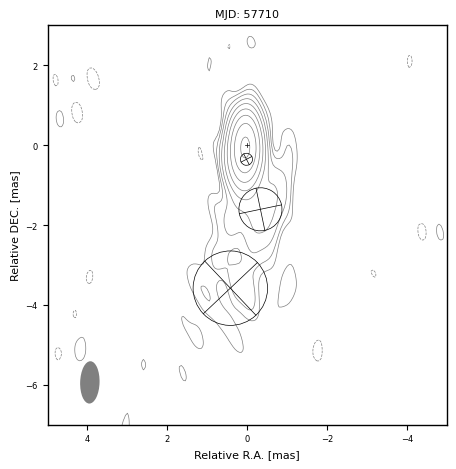

In [15]:
#If you are feeling very fancy, you can also create a movie of the moving components (useful for talks!)
plot_components=True
n_frames=200 #number of frames
interval=50 #milliseconds per frame
save="kinematic_movie.mp4" #output file name

#usual plot parameters can be used here as well
xlim=[5,-5]
ylim=[-7,3]

#Let's create the movie (NOTE: This may take some time!)
im_cube.movie(plot_components=plot_components,n_frames=n_frames,interval=interval,xlim=xlim,ylim=ylim,save=save)

#Let's display the movie
Video(save, embed=True)

2025-03-25 21:31:18,119 - INFO - vcat - Creating movie
Processing:   0%|                                       | 0/200 [00:00<?, ?it/s]2025-03-25 21:31:18,120 - INFO - matplotlib.animation - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-03-25 21:31:18,121 - INFO - matplotlib.animation - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y kinematic_movie2.mp4
/home/flep98/VCAT/vcat/kinematics.py:99: RuntimeWarning: divide by zero encountered in double_scalars
  self.tb = 1.22e12/(self.freq*1e-9)**2 * self.flux * (1 + self.redshift) / maj_for_tb / min_for_tb   #Kovalev et al. 2005
Processing: 201it [07:03,  2.18s/it]                                            2025-03-25 21:38:23,564 - INFO - vcat - Movie for 15GHz exported as 'kinematic_movie2.mp4'
Processing: 201it [07:05,  2.12s/it]


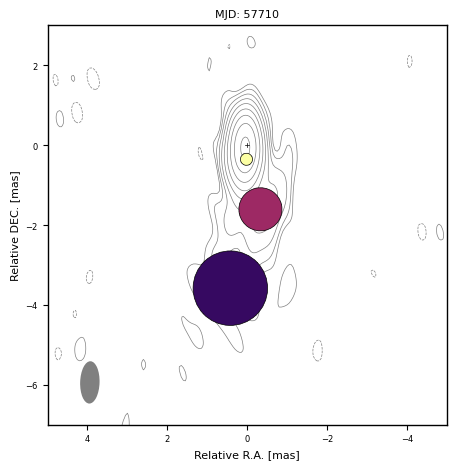

In [16]:
#Optionally, we can also display the components with a colormap, according to their flux density
fill_components=True
component_cmap="inferno"
save="kinematic_movie2.mp4"

#Let's create another movie
im_cube.movie(plot_components=True,fill_components=fill_components,component_cmap=component_cmap,
              n_frames=n_frames,interval=interval,xlim=xlim,ylim=ylim,save=save)

#And display the movie
Video(save, embed=True)